  
**Attribute Information:**
   
1.  ID number 
2.  Diagnosis (M = malignant, B = benign) 

**Ten real-valued features are computed for each cell nucleus:**

1. Radius (mean of distances from center to points on the perimeter) 
2. Texture (standard deviation of gray-scale values) 
3. Perimeter 
4. Area 
5. Smoothness (local variation in radius lengths) 
6. Compactness (perimeter^2 / area - 1.0) 
7. Concavity (severity of concave portions of the contour) 
8. Concave points (number of concave portions of the contour) 
9. Symmetry 
10. Fractal dimension ("coastline approximation" - 1)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer.DESCR

'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

As we can see above, not much can be done in the current form of the dataset. We need to view the data in a better format.

In [3]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


**Dataset info found from sklearn dataset repository**

- mean radius = mean of distances from center to points on the perimeter
- mean texture = standard deviation of gray-scale values
- mean perimeter = mean size of the core tumor
- mean area = 
- mean smoothness = mean of local variation in radius lengths
- mean compactness = mean of perimeter^2 / area - 1.0
- mean concavity = mean of severity of concave portions of the contour
- mean concave points = mean for number of concave portions of the contour
- mean symmetry =
- mean fractal dimension = mean for "coastline approximation" - 1
- radius error = standard error for the mean of distances from center to points on the perimeter
- texture error = standard error for standard deviation of gray-scale values
- perimeter error =
- area error =
- smoothness error = standard error for local variation in radius lengths
- compactness error = standard error for perimeter^2 / area - 1.0
- concavity error = standard error for severity of concave portions of the contour
- concave points error = standard error for number of concave portions of the contour
- symmetry error =
- fractal dimension error = standard error for "coastline approximation" - 1
- worst radius = "worst" or largest mean value for mean of distances from center to points on the perimeter
- worst texture = "worst" or largest mean value for standard deviation of gray-scale values
- worst perimeter =
- worst smoothness = "worst" or largest mean value for local variation in radius lengths
- worst compactness = "worst" or largest mean value for perimeter^2 / area - 1.0
- worst concavity = "worst" or largest mean value for severity of concave portions of the contour
- worst concave points = "worst" or largest mean value for number of concave portions of the contour
- worst fractal dimension = "worst" or largest mean value for "coastline approximation" - 1

In [4]:
df_cancer.shape

(569, 31)

In [5]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

The above plots shows the relationship between our features. But the only problem with them is that they do not show us which of the "dots" is Malignant and which is Benign. 

This issue will be addressed below by using "target" variable as the "hue" for the plots.

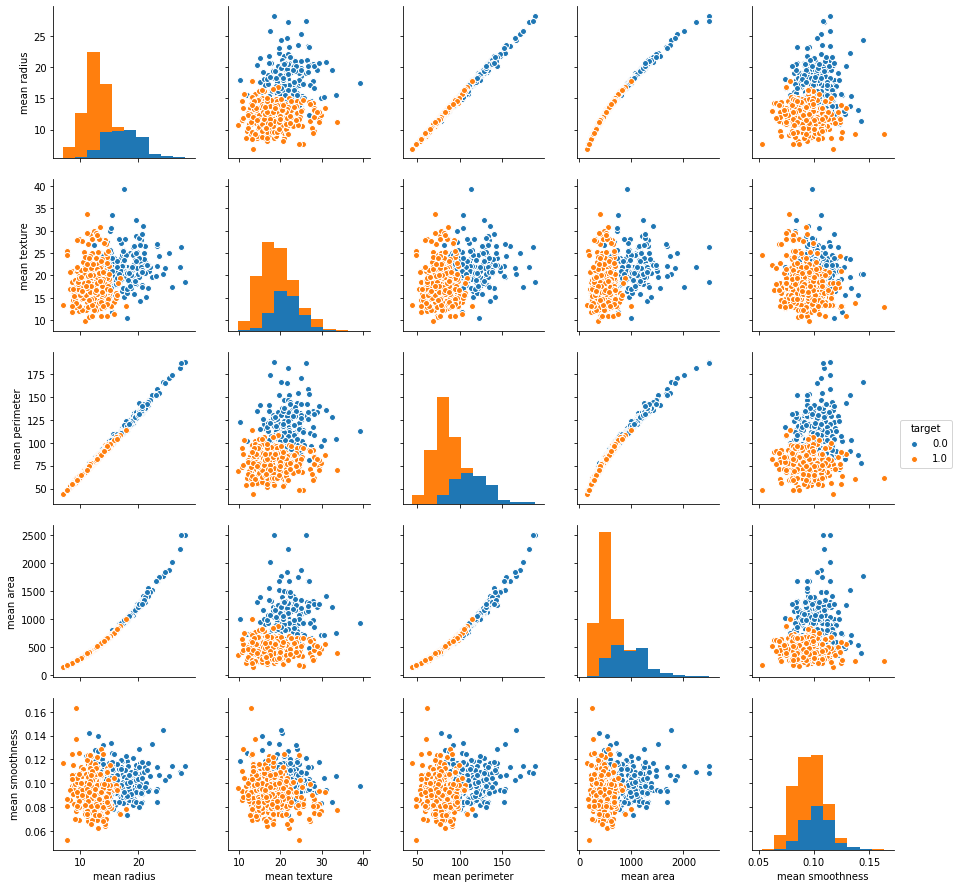

In [6]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

**Note:** 
    
  1.0 (Orange) = Benign (No Cancer)
  
  0.0 (Blue) = Malignant (Cancer)

In [7]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

# correlation between features 

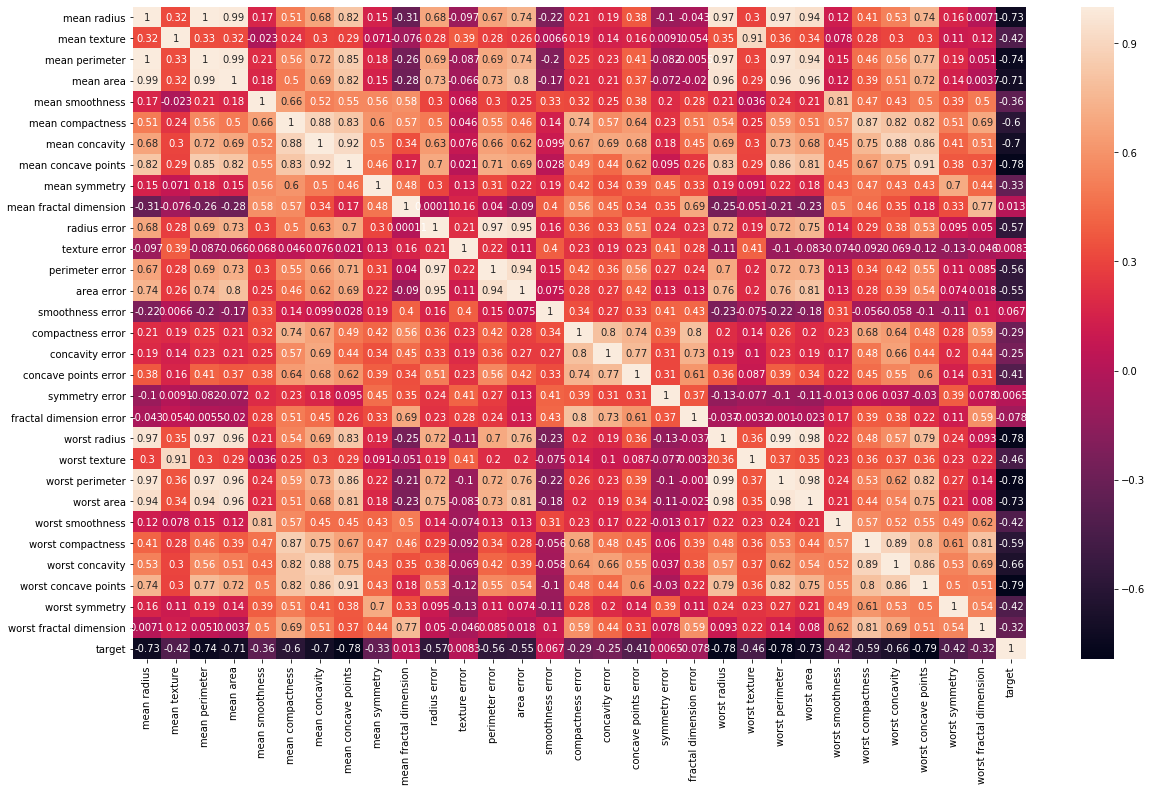

In [8]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True) 

There is a strong correlation between the mean radius and mean perimeter, mean area and mean primeter

# Model Training

** var names as below **
- "y" = predicted feature (Output). this will be "target".
- "X" = remaining columns from df.

In [9]:
X = df_cancer.drop(['target'], axis = 1) # drop "target" feature for training.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

**80:20 ratio for train test splits**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [13]:
print ('Train "X" (input features) shape ', X_train.shape)
print ('Test "X" (input features) shape ', X_test.shape)
print ('Train "y" (output feature) shape ', y_train.shape)
print ('Test "y" (output features) shape ', y_test.shape)

Train "X" (input features) shape  (455, 30)
Test "X" (input features) shape  (114, 30)
Train "y" (output feature) shape  (455,)
Test "y" (output features) shape  (114,)


In [14]:
from sklearn.svm import SVC

In [15]:
svc_model = SVC()

In [16]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_predict = svc_model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,48,0


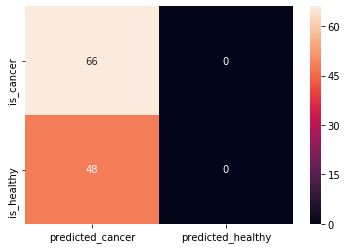

In [20]:
sns.heatmap(confusion, annot=True)

In [21]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        48
        1.0       0.58      1.00      0.73        66

avg / total       0.34      0.58      0.42       114



/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**there are a lot of false positives in this model**

In [22]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [23]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [24]:
X_train_range = (X_train_max- X_train_min)
X_train_range

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.043000
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [25]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


In [26]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [27]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

# SVM with Normalized data

In [29]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,1,47


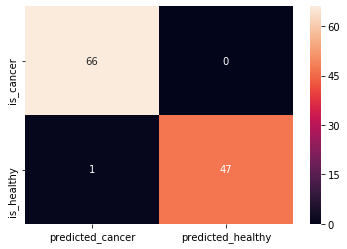

In [30]:
sns.heatmap(confusion,annot=True,fmt="d")

In [31]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

        0.0       1.00      0.98      0.99        48
        1.0       0.99      1.00      0.99        66

avg / total       0.99      0.99      0.99       114



**only 1 false positive**

# Further Model Improvement

# Gridsearch Model

In [32]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [35]:
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9605263157894737, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9407894736842105, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9403973509933775, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.868421052631579, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8741721854304636, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf .............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9470198675496688, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.875, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8940397350993378, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ...................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

**Let's print out the "grid" with the best parameter**

In [36]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


**best parameters are "C" = 100, "gamma" = "0.01" and "kernel" = 'rbf'**

In [37]:
grid_predictions = grid.predict(X_test_scaled)

In [38]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,63,3
is_healthy,0,48


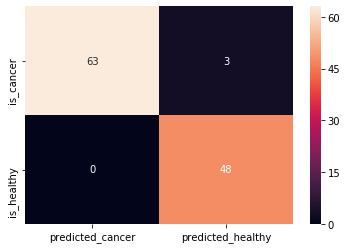

In [39]:
sns.heatmap(confusion, annot=True)

In [40]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

        0.0       0.94      1.00      0.97        48
        1.0       1.00      0.95      0.98        66

avg / total       0.98      0.97      0.97       114



**no FP**

---

## Reference table of common classification metric terms and definitions

<br><br>

|  TERM | DESCRIPTION  |
|---|---|
|**TRUE POSITIVES** | The number of "true" classes correctly predicted to be true by the model. <br><br> `TP = Sum of observations predicted to be 1 that are actually 1`<br><br>The true class in a binary classifier is labeled with 1.|
|**TRUE NEGATIVES** | The number of "false" classes correctly predicted to be false by the model. <br><br> `TN = Sum of observations predicted to be 0 that are actually 0`<br><br>The false class in a binary classifier is labeled with 0.|
|**FALSE POSITIVES** | The number of "false" classes incorrectly predicted to be true by the model. This is the measure of **Type I error**.<br><br> `FP = Sum of observations predicted to be 1 that are actually 0`<br><br>Remember that the "true" and "false" refer to the veracity of your guess, and the "positive" and "negative" component refer to the guessed label.|
|**FALSE NEGATIVES** | The number of "true" classes incorrectly predicted to be false by the model. This is the measure of **Type II error.**<br><br> `FN = Sum of observations predicted to be 0 that are actually 1`<br><br>|
|**TOTAL POPULATION** | In the context of the confusion matrix, the sum of the cells. <br><br> `total population = tp + tn + fp + fn`<br><br>|
|**SUPPORT** | The marginal sum of rows in the confusion matrix, or in other words the total number of observations belonging to a class regardless of prediction. <br><br>|
|**ACCURACY** | The number of correct predictions by the model out of the total number of observations. <br><br> `accuracy = (tp + tn) / total_population`<br><br>|
|**PRECISION** | The ability of the classifier to avoid labeling a class as a member of another class. <br><br> `Precision = True Positives / (True Positives + False Positives)`<br><br>_A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class.  precision score of 0 would mean that the classifier misclassified every instance of the current class_ |
|**RECALL/SENSITIVITY**    | The ability of the classifier to correctly identify the current class. <br><br>`Recall = True Positives / (True Positives + False Negatives)`<br><br>A recall of 1 indicates that the classifier correctly predicted all observations of the class.  0 means the classifier predicted all observations of the current class incorrectly.|
|**SPECIFICITY** | Percent of times the classifier predicted 0 out of all the times the class was 0.<br><br> `specificity = tn / (tn + fp)`<br><br>|
|**FALSE POSITIVE RATE** | Percent of times model predicts 1 when the class is 0.<br><br> `fpr = fp / (tn + fp)`<br><br>|
|**F1-SCORE** | The harmonic mean of the precision and recall. The harmonic mean is used here rather than the more conventional arithmetic mean because the harmonic mean is more appropriate for averaging rates. <br><br>`F1-Score = 2 * (Precision * Recall) / (Precision + Recall)` <br><br>_The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once._ |

In [41]:
from sklearn.externals import joblib
pickle_file = "SVM_L1.pkl"
joblib.dump(grid, pickle_file)

['SVM_L1.pkl']

In [42]:
def load_clf(path):
    return joblib.load(path)

def load_sub_clf(parent_list, file_list):
    sub_clf_dict = {}
    for parent, file in zip(parent_list, file_list):
        sub_clf_dict[parent] = load_clf(file)
    return sub_clf_dict;

In [43]:
def get_clf_prob(clf, x):
    return clf.predict_proba(x)

def get_sub_clf_prob(x_all,parent_prob, sub_clf_dict, precision_setting):
    result = []
    for prob, x in zip(parent_prob, x_all):
        prob_dict = {}
        for p in prob:
            index = np.where(prob == p)[0][0] + 2
            # start index from 2 as 1 is root
            sub_cat_list = dictC[index]
            if(len(sub_cat_list) == 1):
                prob_dict[sub_cat_list[0]] = round(1 * p, precision_setting)
            else:
                clf = sub_clf_dict[index]
                sub_prob = clf.predict_proba([x])
                sub_cat_arr = clf.classes_
                for sub_cat, sub_p in np.nditer([sub_cat_arr, sub_prob]):
                    prob_dict[int(sub_cat)] = round(sub_p * p, precision_setting)
        result.append(prob_dict)
    return result;

In [44]:
from sklearn.utils import class_weight
def get_norm_class_weight():
    class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
    return class_weights

In [45]:
class_weights = get_norm_class_weight()
print(class_weights)

[1.38719512 0.78178694]


In [49]:
grid_2 = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid_3 = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid_4 = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

grid_2.fit(X_train_scaled,y_train)
grid_3.fit(X_train_scaled,y_train)
grid_4.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9605263157894737, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9407894736842105, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9403973509933775, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.868421052631579, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8741721854304636, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf .............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9470198675496688, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.875, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8940397350993378, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ...................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6423841059602649, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6423841059602649, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9605263157894737, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9605263157894737, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9668874172185431, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ...............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9403973509933775, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.868421052631579, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8741721854304636, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6423841059602649, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ......

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


In [54]:
grid_list = [grid_2, grid_3, grid_4]

prefix = "SVM_L"

for x in range(2,5):
    pickle_file = prefix + str(x) + ".pkl"
    joblib.dump(grid_list[x-2], pickle_file)

In [56]:
file_list = ["SVM_L1.pkl","SVM_L2.pkl","SVM_L3.pkl","SVM_L4.pkl"]
parent_list = [1,2,3,4]
sub_clf_dict = load_sub_clf(parent_list, file_list)
sub_clf_dict

{1: GridSearchCV(cv=None, error_score='raise',
        estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
        fit_params=None, iid=True, n_jobs=1,
        param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring=None, verbose=4), 2: GridSearchCV(cv=None, error_score='raise',
        estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
        fit_params=None, iid=True, n_jobs=1,
        param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
        pre_dispatch='2*n

In [79]:
p6 = np.array([0.6,0.6,0.6,0.6])
p7 = np.array([0.7,0.7,0.7,0.7])
p8 = np.array([0.8,0.8,0.8,0.8])
p9 = np.array([0.9,0.9,0.9,0.9])
parent_prob = np.array([p6,p7,p8,p9])
X_all = [X_test_scaled, X_test_scaled, X_test_scaled, X_test_scaled]
precision = 4
dictC = [["schema1"],["schema2"],["schema3"],["schema4"]]
h_result_final = get_sub_clf_prob(X_all,parent_prob, sub_clf_dict, precision)

### compare CNN with Heirarchical-SVM

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(X_train_scaled.shape, 16),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5)])

model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1, activation='sigmoid')])

model.summary()

In [ ]:
model.fit(X_train_scaled, y_train,
              batch_size=5,
              epochs=3,
              validation_data=(X_test_scaled, y_test),
              shuffle=True)
model.evaluate(X_test_scaled, y_test, verbose=1)